In [379]:
import pandas as pd

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from dateutil.parser import parse



Each year, the Kansas Board of Regents releases databooks for the previous academic year. This notebook is meant to analyize Table 4.35: Average Salaries of Instructional Faculty, Compared to Peer Institutions. 


# Compiling the data
The data is spread across different PDFs on the [kansasregents.org](kansasregents.org).


Table 4.35

[2016](https://www.kansasregents.org/resources/4.35_Average_Salaries_of_Instructional_Faculty_Compared_to_Peer_Inst_FY2016.pdf)
[2015](https://www.kansasregents.org/resources/PDF/Data/4.35_Average_Salaries_of_Instructional_Faculty_Compared_to_Peer_Institutions_FY2014.pdf)
[2014](https://www.kansasregents.org/resources/PDF/Data/4.35_Average_Salaries_of_Instructional_Faculty_Compared_to_Peer_Institutions_Fiscal_Year_2014.pdf)

[2013](http://data.kansasregents.org/published_reports/databook/2014/Section4/4.35_Avg_Salaries_of_Instructional_Faculty_Compared_to_Peer_Institutions_FY2012.pdf)

[2012](http://data.kansasregents.org/published_reports/databook/2012_Databook.pdf)

In [380]:
raw = [
    {
        "name": "University of Kansas",
        "average salary": 92200,
        "peer group": 106788,
        "relative funding": .863,
        "fiscal year": 2016
    },
    {
        "name": "Kansas State University",
        "average salary": 99500,
        "peer group": 84683,
        "relative funding": 1.175,
        "fiscal year": 2016
    },
    {
        "name": "Wichita State University",
        "average salary": 72000,
        "peer group": 91039,
        "relative funding": .791,
        "fiscal year": 2016
    },
    {
        "name": "Emporia State University",
        "average salary": 59600,
        "peer group": 66586,
        "relative funding": .895,
        "fiscal year": 2016
    },
    {
        "name": "Pittsburg State University",
        "average salary": 66500,
        "peer group": 63375,
        "relative funding": 1.049,
        "fiscal year": 2016
    },
    {
        "name": "Fort Hays State University",
        "average salary": 62800,
        "peer group": 64572,
        "relative funding": .973,
        "fiscal year": 2016
    },
    {
        "name": "Total",
        "average salary": 87410,
        "peer group": 95458,
        "relative funding": .916,
        "fiscal year": 2016
    },
    
    
    
    
    {
        "name": "University of Kansas",
        "average salary": 92600,
        "peer group": 104349,
        "relative funding": .887,
        "fiscal year": 2015
    },
    {
        "name": "Kansas State University",
        "average salary": 78300,
        "peer group": 85084,
        "relative funding": .92,
        "fiscal year": 2015
    },
    {
        "name": "Wichita State University",
        "average salary": 71300,
        "peer group": 87815,
        "relative funding": .812,
        "fiscal year": 2015
    },
    {
        "name": "Emporia State University",
        "average salary": 58500,
        "peer group": 64876,
        "relative funding": .902,
        "fiscal year": 2015
    },
    {
        "name": "Pittsburg State University",
        "average salary": 63800,
        "peer group": 73876,
        "relative funding": .864,
        "fiscal year": 2015
    },
    {
        "name": "Fort Hays State University",
        "average salary": 62200,
        "peer group": 60895,
        "relative funding": 1.021,
        "fiscal year": 2015
    },
    {
        "name": "Total",
        "average salary": 80029,
        "peer group": 88841,
        "relative funding": .901,
        "fiscal year": 2015
    },
    
    
    
        {
        "name": "University of Kansas",
        "average salary": 91000,
        "peer group": 98214,
        "relative funding": .927,
        "fiscal year": 2014
    },
    {
        "name": "Kansas State University",
        "average salary": 74800,
        "peer group": 84708,
        "relative funding": .883,
        "fiscal year": 2014
    },
    {
        "name": "Wichita State University",
        "average salary": 73559,
        "peer group": 85172,
        "relative funding": .864,
        "fiscal year": 2014
    },
    {
        "name": "Emporia State University",
        "average salary": 57700,
        "peer group": 64561,
        "relative funding": .894,
        "fiscal year": 2014
    },
    {
        "name": "Pittsburg State University",
        "average salary": 62500,
        "peer group": 70664,
        "relative funding": .884,
        "fiscal year": 2014
    },
    {
        "name": "Fort Hays State University",
        "average salary": 61200,
        "peer group": 62028,
        "relative funding": .987,
        "fiscal year": 2014
    },
    {
        "name": "Total",
        "average salary": 77550,
        "peer group": 85137,
        "relative funding": .911,
        "fiscal year": 2014
    },
    

    {
        "name": "University of Kansas",
        "average salary": 89200,
        "peer group": 97952,
        "relative funding": .911,
        "fiscal year": 2013
    },
    {
        "name": "Kansas State University",
        "average salary": 73300,
        "peer group": 80433,
        "relative funding": .911,
        "fiscal year": 2013
    },
    {
        "name": "Wichita State University",
        "average salary": 71300,
        "peer group": 84632,
        "relative funding": .842,
        "fiscal year": 2013
    },
    {
        "name": "Emporia State University",
        "average salary": 57700,
        "peer group": 67062,
        "relative funding": .86,
        "fiscal year": 2013
    },
    {
        "name": "Pittsburg State University",
        "average salary": 62200,
        "peer group": 67456,
        "relative funding": .922,
        "fiscal year": 2013
    },
    {
        "name": "Fort Hays State University",
        "average salary": 59400,
        "peer group": 62505,
        "relative funding": .95,
        "fiscal year": 2013
    },
    {
        "name": "Total",
        "average salary": 76214,
        "peer group": 85987,
        "relative funding": .876,
        "fiscal year": 2013
    },
    
    
    {
        "name": "University of Kansas",
        "average salary": 87300,
        "peer group": 100325,
        "relative funding": .87,
        "fiscal year": 2012
    },
    {
        "name": "Kansas State University",
        "average salary": 73800,
        "peer group": 79822,
        "relative funding": .925,
        "fiscal year": 2012
    },
    {
        "name": "Wichita State University",
        "average salary": 71500,
        "peer group": 82957,
        "relative funding": .862,
        "fiscal year": 2012
    },
    {
        "name": "Emporia State University",
        "average salary": 56700,
        "peer group": 65500,
        "relative funding": .866,
        "fiscal year": 2012
    },
    {
        "name": "Pittsburg State University",
        "average salary": 61300,
        "peer group": 66557,
        "relative funding": .921,
        "fiscal year": 2012
    },
    {
        "name": "Fort Hays State University",
        "average salary": 57500,
        "peer group": 63065,
        "relative funding": .912,
        "fiscal year": 2012
    },
    {
        "name": "Total",
        "average salary": 75452,
        "peer group": 88069,
        "relative funding": .857,
        "fiscal year": 2012
    },
    {
        "name": "University of Kansas",
        "average salary": 95600,
        "peer group": 109120,
        "relative funding": .876,
        "fiscal year": 2017
    },
    {
        "name": "Kansas State University",
        "average salary": 79300,
        "peer group": 87935,
        "relative funding": .902,
        "fiscal year": 2017
    },
    {
        "name": "Wichita State University",
        "average salary": 72100,
        "peer group": 92996,
        "relative funding": .775,
        "fiscal year": 2017
    },
    {
        "name": "Emporia State University",
        "average salary": 62100,
        "peer group": 68495,
        "relative funding": .907,
        "fiscal year": 2017
    },
    
    
    {
        "name": "Pittsburg State University",
        "average salary": 66300,
        "peer group": 78107,
        "relative funding": .849,
        "fiscal year": 2017
    },
    {
        "name": "Fort Hays State University",
        "average salary": 61600,
        "peer group": 62542,
        "relative funding": .985,
        "fiscal year": 2017
    },
    {
        "name": "Total",
        "average salary": 81949,
        "peer group": 97878,
        "relative funding": .837,
        "fiscal year": 2017
    }
    

    

]


df = pd.DataFrame(raw)


# Mistake for KSU
KSU submitted the wrong data for 2016.

To correct this, I will determine the KSU funding by using the relative funding provided in the 2017 dataset.

In [381]:
peer = df.ix[1,"peer group"]
new_relative_funding = .934
new_average_salary = new_relative_funding * peer
new_average_salary
df = df.set_value(1,"average salary", new_average_salary)
df = df.set_value(1,"relative funding", new_relative_funding)




# Pitsburg Too
PItsburgh seems to have made a similar mistake. The footnote in the 2017 resource says the numbers are different for 2016.

In [382]:
peer = df.ix[4,"peer group"]
new_relative_funding = .879
new_average_salary = new_relative_funding * peer
new_average_salary
df = df.set_value(4,"average salary", new_average_salary)
df = df.set_value(4,"relative funding", new_relative_funding)


# Test the data
Relative funding should be average salary divided by relative funding. If this is not the case, I most likely made an input error.


In [383]:
df["test"] = round(df["average salary"]/df["peer group"],3)

df["same?"] = df["relative funding"] - df["test"]

df[df["same?"] != 0]

,average salary,fiscal year,name,peer group,relative funding,test,same?
27,76214,2013,Total,85987,0.876,0.886,-0.01


The small difference is likely due to rounding. 

# Making the graphic

In [384]:
df = df.sort_values("fiscal year")
df["fiscal year"] = df["fiscal year"]#.apply(str).apply(parse)
df = df.set_index("fiscal year")


/Users/Stephan/.virtualenvs/data-analysis/lib/python3.5/site-packages/matplotlib/axes/_axes.py:4906: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  XY1 = np.array([x[where], y1[where]]).T
/Users/Stephan/.virtualenvs/data-analysis/lib/python3.5/site-packages/matplotlib/axes/_axes.py:4907: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  XY2 = np.array([x[where], y2[where]]).T


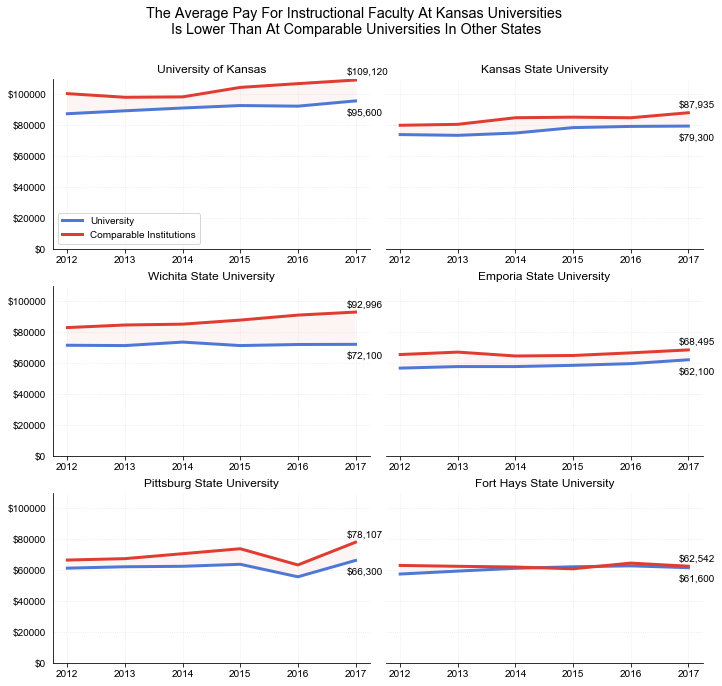

In [385]:
matplotlib.rcParams['font.sans-serif'] = "Arial"
def get_graph(ax1,name):
    df_plot = df[df["name"] == name]
    ax1.plot(df_plot.index,df_plot["average salary"],color="#4f78d6",linewidth=3)
    ax1.plot(df_plot.index, df_plot["peer group"],color="#e03c31",linewidth=3)
    ax1.set_ylim(0,110000)
    #ax1.legend(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    y1 = df_plot["average salary"]
    y2 = df_plot["peer group"]
    ax1.fill_between(df_plot.index,y1,y2,where=y1 >= y2, facecolor='#4f78d6',alpha=.05, interpolate=True)
    ax1.fill_between(df_plot.index,y1,y2,where=y1 <= y2, facecolor="#e03c31",alpha=.05, interpolate=True)
    ax1.grid(which='major', linestyle=':',alpha=.3)
    ax1.set_title(name)
    fmt = '${x:.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax1.yaxis.set_major_formatter(tick)
    ax1.tick_params(which='both', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='on') # turn off bottom ticks
    
    last_points = sorted([y1.tail(1).item(),y2.tail(1).item()])
    last_1 = (last_points[0])
    last_2 = (last_points[1])
    
       
    ax1.text(2016.84, last_1-9000, "${},{}".format(str(last_1)[:-3],str(last_1)[-3:]) )
    ax1.text(2016.84, last_2+3500, '$'+str(last_2)[:-3]+","+str(last_2)[-3:])
    ax1.xaxis.set_ticks([2012, 2013,2014,2015,2016,2017])


    
fig, ((ax1, ax2),(ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(10,10),sharex=False, sharey=True)
title = "The Average Pay For Instructional Faculty At Kansas Universities \nIs Lower Than At Comparable Universities In Other States"
st = fig.suptitle(title, fontsize="x-large")

#Total
get_graph(ax1,"University of Kansas")
ax1.legend(("University","Comparable Institutions"),frameon=True)

#Kansas State University
get_graph(ax2,"Kansas State University")
ax2.spines['left'].set_visible(False)


get_graph(ax3, "Wichita State University")


get_graph(ax4, "Emporia State University")
ax4.spines['left'].set_visible(False)


get_graph(ax5, "Pittsburg State University")


get_graph(ax6, "Fort Hays State University")
ax6.spines['left'].set_visible(False)


plt.tight_layout()

st.set_y(0.95)
fig.subplots_adjust(top=0.85)

# from the data book

"Instructional staff data included in this table does not include temporary replacements for faculty on sabbatical leave; 
instructional faculty who are not employed on a full‐time basis; faculty who donate services; faculty in a military 
organization and paid on a different scale from civilian employees; administrative officers with titles such as Dean of 
Instruction, Academic Dean, Librarian, Registrar, Coach, etc., even though they may devote part of their time to classroom 
instruction and have faculty rank; and undergraduate students who assist in the instruction of courses, but who have titles 
such as Teaching Assistant, Teaching Associate, etc. "